In [1]:
from dataset import ImageDataset, load_dataset, train_val_split, data_augmentation
from model import CNN, CNNWithNAL
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# CIFAR
## Load dataset

In [2]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/CIFAR.npz')

## Preprocessing

In [3]:
training_subset, training_sub_labels, validation_subset, validation_sub_labels = train_val_split(training_data, training_labels)
aug_training, aug_labels = data_augmentation(training_subset, training_sub_labels)

train_dataset = ImageDataset(training_subset, training_sub_labels)
val_dataset = ImageDataset(validation_subset, validation_sub_labels)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [ ]:
import os
prediction_results = []
accuracy_results = []
T_hats = []
for round in range(10):
    print(f"----------Training CNN round {round+1}/10----------")
    cnn = CNN(num_classes=3, dataset_name="CIFAR")
    cnn.train(train_dataset, val_dataset)
    y_true, y_pred = cnn.predict(test_dataset)
    prediction_results.append((y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_results.append(accuracy)
    T_hats.append(train_dataset.transition_matrix)
    # reset transition matrix
    train_dataset.transition_matrix = None
    val_dataset.transition_matrix = None
    print(f"CNN Test Acc: {accuracy*100:.2f}%")

with open('results/cnn_CIFAR_pred_results.pkl', 'wb') as f:
    pickle.dump(prediction_results, f)

with open('results/cnn_CIFAR_acc_results.pkl', 'wb') as f:
    pickle.dump(accuracy_results, f)

with open('results/cnn_CIFAR_transition_matrices.pkl', 'wb') as f:
    pickle.dump(T_hats, f)

----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 1.1103, Validation Loss: 1.0977, Validation Accuracy: 35.30%
Epoch [2/100], Training Loss: 1.0993, Validation Loss: 1.0988, Validation Accuracy: 37.70%
Epoch [3/100], Training Loss: 1.0920, Validation Loss: 1.0989, Validation Accuracy: 36.00%
Epoch [4/100], Training Loss: 1.0921, Validation Loss: 1.1107, Validation Accuracy: 35.50%
Epoch [5/100], Training Loss: 1.0876, Validation Loss: 1.0998, Validation Accuracy: 37.03%
Epoch [6/100], Training Loss: 1.0780, Validation Loss: 1.1110, Validation Accuracy: 37.27%
Epoch [7/100], Training Loss: 1.0629, Validation Loss: 1.1358, Validation Accuracy: 35.27%
Epoch [8/100], Training Loss: 1.0304, Validation Loss: 1.1674, Validation Accuracy: 34.57%
Epoch [9/100], Training Loss: 0.9641, Validation Loss: 1.2806, Validation Accuracy: 35.37%
Epoch [10/100], Training Loss: 0.8242, Validation Loss: 1.5229, Validation Accuracy: 35.17%
Epoch [11/100], Training Loss: 0.6085, Valida

## CNN with Noise Adaption Layer Training

In [4]:
import os
prediction_results = []
accuracy_results = []
for round in range(10):
    print(f"----------Training CNN round {round+1}/10----------")
    cnn = CNNWithNAL(num_classes=3, dataset_name="CIFAR")
    cnn.train(train_dataset, val_dataset)
    y_true, y_pred = cnn.predict(test_dataset)
    prediction_results.append((y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_results.append(accuracy)
    # reset transition matrix
    train_dataset.transition_matrix = None
    val_dataset.transition_matrix = None
    print(f"CNN Test Acc: {accuracy*100:.2f}%")

with open('results/cnnwithnal_CIFAR_pred_results.pkl', 'wb') as f:
    pickle.dump(prediction_results, f)

with open('results/cnnwithnal_CIFAR_acc_results.pkl', 'wb') as f:
    pickle.dump(accuracy_results, f)

with open('results/cnnwithnal_CIFAR_transition_matrices.pkl', 'wb') as f:
    pickle.dump(T_hats, f)

----------Training CNN round 1/10----------
Epoch: 0/100


c:\Users\Ronald\Desktop\COMP5328_A2\utils.py:30: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  print('# Train || Loss : %.4f , Acc : %.4f%%' % (train_loss_meter.val, train_acc_meter.val * 100.0))


# Train || Loss : 1.1085 , Acc : 36.4583%
# Evaluation || Loss : 1.0953, Acc : 35.7143%
Epoch: 1/100
# Train || Loss : 1.0981 , Acc : 35.4167%
# Evaluation || Loss : 1.1180, Acc : 28.5714%
Epoch: 2/100
# Train || Loss : 1.1046 , Acc : 37.5000%
# Evaluation || Loss : 1.1045, Acc : 32.1429%
Epoch: 3/100
# Train || Loss : 1.0881 , Acc : 38.5417%
# Evaluation || Loss : 1.0999, Acc : 42.8571%
Epoch: 4/100
# Train || Loss : 1.1221 , Acc : 33.3333%
# Evaluation || Loss : 1.0778, Acc : 46.4286%
Epoch: 5/100
# Train || Loss : 1.1010 , Acc : 36.4583%
# Evaluation || Loss : 1.0778, Acc : 46.4286%
Epoch: 6/100
# Train || Loss : 1.1066 , Acc : 36.4583%
# Evaluation || Loss : 1.1419, Acc : 32.1429%
Epoch: 7/100
# Train || Loss : 1.1104 , Acc : 38.5417%
# Evaluation || Loss : 1.1469, Acc : 35.7143%
Epoch: 8/100
# Train || Loss : 1.1204 , Acc : 36.4583%
# Evaluation || Loss : 1.1027, Acc : 30.3571%
Epoch: 9/100
# Train || Loss : 1.0548 , Acc : 47.9167%
# Evaluation || Loss : 1.1009, Acc : 44.6429%
Epo

NameError: name 'T_hats' is not defined

# Visualisation

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_CIFAR_acc_results.pkl', 'rb') as f:
    cnn_acc_CIFAR = pickle.load(f)

with open('results/cnnwithnal_CIFAR_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_CIFAR = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_CIFAR, cnnwithnal_acc_CIFAR], labels=models)
axs[0].set_title('Accuracy Comparison on CIFAR')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_CIFAR), np.mean(cnnwithnal_acc_CIFAR)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on CIFAR')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pandas'

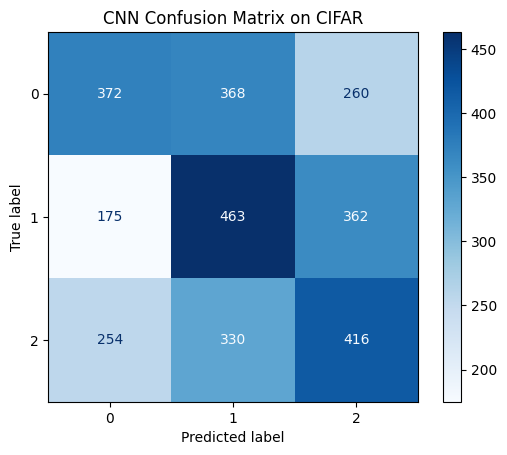

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
with open('results/cnn_CIFAR_pred_results.pkl', 'rb') as f:
    cnn_pred_results_CIFAR = pickle.load(f)
y_true = cnn_pred_results_CIFAR[0][0]
y_pred = cnn_pred_results_CIFAR[0][1]
cm = confusion_matrix(y_true, y_pred)
confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
confusion_disp.plot(cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix on CIFAR')
plt.show()